In [ ]:
!pwd

/content


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/CodingGoogleColab/contrast-fel.csv", sep=',')




In [ ]:
df


,Site,Partition,alpha,beta (background),beta (Foreground),subs (Foreground),P-value (overall),Q-value (overall),Permutation p-value,Total branch length
0,1,1,0.000,0.000,0.000,1.0,1.000,1.000,1.000,0.000
1,2,1,7.599,1.386,0.344,17.0,0.010,0.018,0.333,735.125
2,3,1,1.127,0.602,0.315,10.0,0.237,0.303,-1.000,179.093
3,4,1,1.392,0.841,0.469,13.0,0.316,0.398,-1.000,240.017
4,5,1,4.397,0.321,4.648,17.0,0.049,0.074,0.250,835.186
...,...,...,...,...,...,...,...,...,...,...
188,189,1,0.429,0.138,0.300,20.0,0.562,0.642,-1.000,77.101
189,190,1,0.823,1.435,0.198,28.0,0.043,0.068,0.200,234.654
190,191,1,0.818,0.553,0.198,37.0,0.062,0.093,-1.000,139.287
191,192,1,0.691,0.241,0.330,47.0,0.600,0.677,-1.000,110.238


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/CodingGoogleColab/datamonkey-table.csv", sep=',')


In [ ]:
df

,Site,Partition,alpha,beta (background),beta (Foreground),subs (Foreground),P-value (overall),Q-value (overall),Permutation p-value,Total branch length
0,1,1,0.000,0.000,0.000,1.0,1.000,1.000,1.000,0.000
1,2,1,7.599,1.386,0.344,17.0,0.010,0.018,0.333,735.125
2,3,1,1.127,0.602,0.315,10.0,0.237,0.303,-1.000,179.093
3,4,1,1.392,0.841,0.469,13.0,0.316,0.398,-1.000,240.017
4,5,1,4.397,0.321,4.648,17.0,0.049,0.074,0.250,835.186
...,...,...,...,...,...,...,...,...,...,...
188,189,1,0.429,0.138,0.300,20.0,0.562,0.642,-1.000,77.101
189,190,1,0.823,1.435,0.198,28.0,0.043,0.068,0.200,234.654
190,191,1,0.818,0.553,0.198,37.0,0.062,0.093,-1.000,139.287
191,192,1,0.691,0.241,0.330,47.0,0.600,0.677,-1.000,110.238


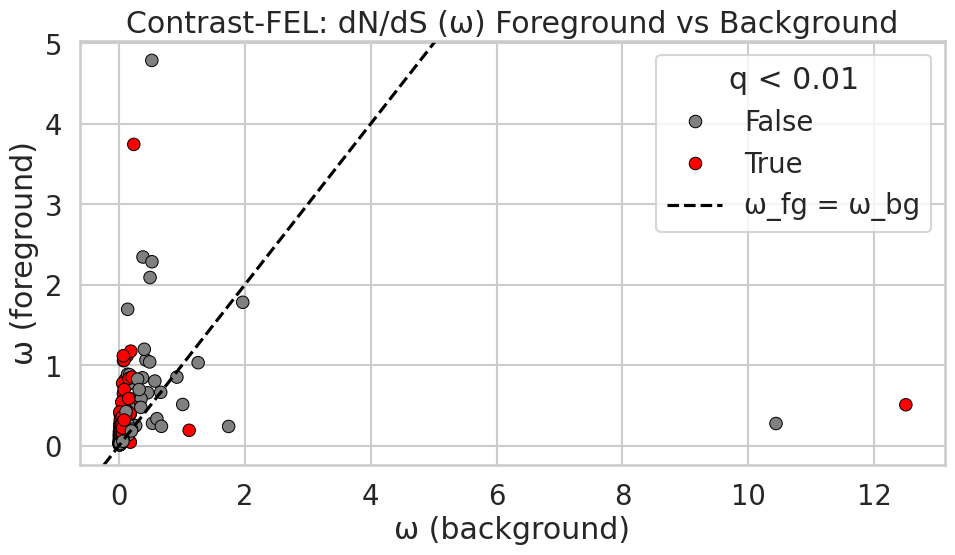

Top significant sites (p < 0.05):
    Site  omega_background  omega_foreground  Q-value (overall)
8      9          0.089552          0.366350                0.0
7      8          0.007614          0.032995                0.0
11    12          0.057569          0.196162                0.0
10    11          0.136108          0.362205                0.0
12    13          0.047351          0.412627                0.0
17    18          0.036274          0.217642                0.0
15    16          0.059880          0.307784                0.0
14    15          0.070819          0.343003                0.0
25    26          0.098820          0.820059                0.0
24    25          0.070959          0.649146                0.0


In [ ]:
# Filter invalid alpha values to avoid division by zero
df = df[df["alpha"] > 0]
df = df[df["beta (background)"] > 0]
df = df[df["beta (Foreground)"] > 0]


# Compute omega
df["omega_background"] = df["beta (background)"] / df["alpha"]
df["omega_foreground"] = df["beta (Foreground)"] / df["alpha"]

# Filter for significant sites
df["significant"] = df["Q-value (overall)"] < 0.05

# Plot ω_foreground vs ω_background
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="omega_background",
    y="omega_foreground",
    hue="significant",
    palette={True: "red", False: "grey"},
    edgecolor="black"
)

plt.axline((0, 0), slope=1, linestyle='--', color='black', label="ω_fg = ω_bg")
plt.xlabel("ω (background)")
plt.ylabel("ω (foreground)")
plt.title("Contrast-FEL: dN/dS (ω) Foreground vs Background")
plt.legend(title="q < 0.01")
plt.grid(True)
plt.tight_layout()
plt.show()

# Print top significant sites
print("Top significant sites (p < 0.05):")
print(df[df["significant"]].sort_values("Q-value (overall)")[["Site", "omega_background", "omega_foreground", "Q-value (overall)"]].head(10))

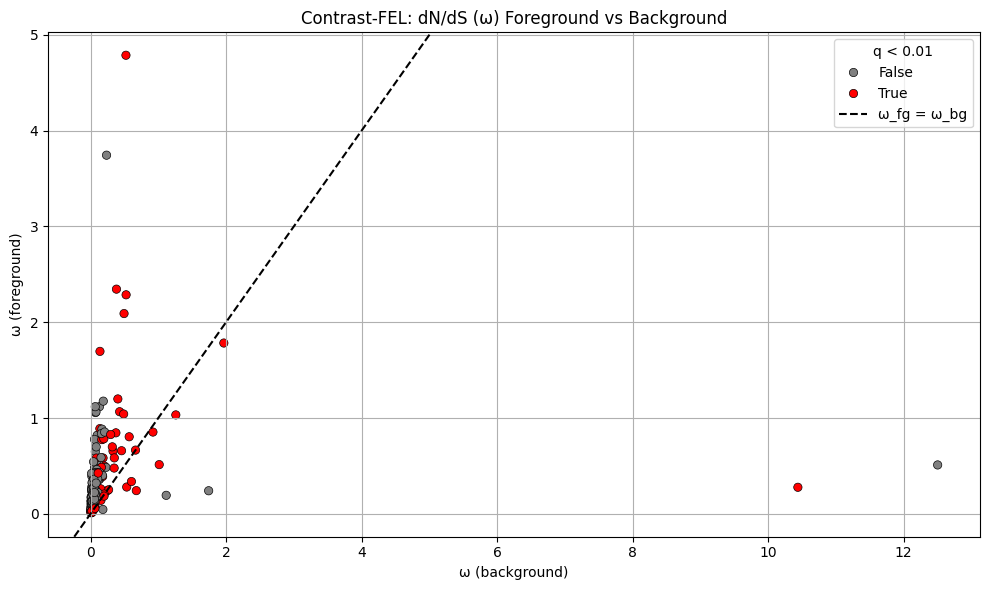

Top significant sites (p < 0.01):
    Site  omega_background  omega_foreground  Permutation p-value
2      3          0.534161          0.279503                 -1.0
3      4          0.604167          0.336925                 -1.0
5      6          0.108295          0.215273                 -1.0
13    14          0.185022          0.582966                 -1.0
16    17          1.967606          1.783099                 -1.0
18    19          0.331984          0.654858                 -1.0
19    20          0.457983          0.658613                 -1.0
20    21          0.429780          1.065990                 -1.0
21    22          0.139498          1.695925                 -1.0
27    28          0.250538          0.242473                 -1.0


In [ ]:
# Filter invalid alpha values to avoid division by zero
df = df[df["alpha"] > 0]
df = df[df["beta (background)"] > 0]
df = df[df["beta (Foreground)"] > 0]


# Compute omega
df["omega_background"] = df["beta (background)"] / df["alpha"]
df["omega_foreground"] = df["beta (Foreground)"] / df["alpha"]

# Filter for significant sites
df["significant"] = df["Permutation p-value"] < 0.001

# Plot ω_foreground vs ω_background
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="omega_background",
    y="omega_foreground",
    hue="significant",
    palette={True: "red", False: "grey"},
    edgecolor="black"
)

plt.axline((0, 0), slope=1, linestyle='--', color='black', label="ω_fg = ω_bg")
plt.xlabel("ω (background)")
plt.ylabel("ω (foreground)")
plt.title("Contrast-FEL: dN/dS (ω) Foreground vs Background")
plt.legend(title="q < 0.01")
plt.grid(True)
plt.tight_layout()
plt.show()

# Print top significant sites
print("Top significant sites (p < 0.01):")
print(df[df["significant"]].sort_values("Permutation p-value")[["Site", "omega_background", "omega_foreground", "Permutation p-value"]].head(10))

In [ ]:
df.sort_values("omega_background")

,Site,Partition,alpha,beta (background),beta (Foreground),subs (Foreground),P-value (overall),Q-value (overall),Permutation p-value,Total branch length,omega_background,omega_foreground,significant
156,157,1,1.362,0.003,0.054,46.0,0.000,0.000,0.500,104.459,0.002203,0.039648,True
112,113,1,0.662,0.003,0.014,36.0,0.066,0.099,-1.000,49.698,0.004532,0.021148,False
166,167,1,1.325,0.007,0.019,72.0,0.223,0.289,-1.000,98.621,0.005283,0.014340,False
144,145,1,0.565,0.003,0.039,26.0,0.001,0.001,1.000,45.281,0.005310,0.069027,True
142,143,1,1.402,0.008,0.057,89.0,0.001,0.002,0.500,108.238,0.005706,0.040656,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,68,1,1.162,1.463,1.200,57.0,0.789,0.832,-1.000,366.218,1.259036,1.032702,False
189,190,1,0.823,1.435,0.198,28.0,0.043,0.068,0.200,234.654,1.743621,0.240583,False
16,17,1,0.710,1.397,1.266,37.0,0.977,0.983,-1.000,333.241,1.967606,1.783099,False
182,183,1,1.084,11.317,0.300,17.0,0.087,0.129,-1.000,1328.542,10.440037,0.276753,False


In [ ]:
df.sort_values("significant")

,Site,Partition,alpha,beta (background),beta (Foreground),subs (Foreground),P-value (overall),Q-value (overall),Permutation p-value,Total branch length,omega_background,omega_foreground,significant
59,60,1,0.945,0.354,0.799,78.0,0.182,0.241,-1.0,189.421,0.374603,0.845503,False
163,164,1,0.966,0.024,0.036,39.0,0.354,0.433,-1.0,76.361,0.024845,0.037267,False
164,165,1,0.589,0.021,0.056,66.0,0.036,0.058,1.0,50.715,0.035654,0.095076,False
53,54,1,0.622,0.251,0.746,50.0,0.310,0.393,-1.0,149.482,0.403537,1.199357,False
52,53,1,0.821,0.137,0.636,72.0,0.096,0.138,-1.0,140.236,0.166870,0.774665,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,92,1,1.012,0.041,0.350,101.0,0.000,0.000,1.0,113.964,0.040514,0.345850,True
92,93,1,0.878,0.030,0.143,76.0,0.000,0.000,1.0,81.699,0.034169,0.162870,True
93,94,1,1.149,0.025,0.079,75.0,0.012,0.020,0.5,94.057,0.021758,0.068755,True
119,120,1,0.839,0.019,0.113,72.0,0.000,0.000,1.0,74.512,0.022646,0.134684,True


In [ ]:
df = df.sort_values("Site")
df

NameError: name 'df' is not defined

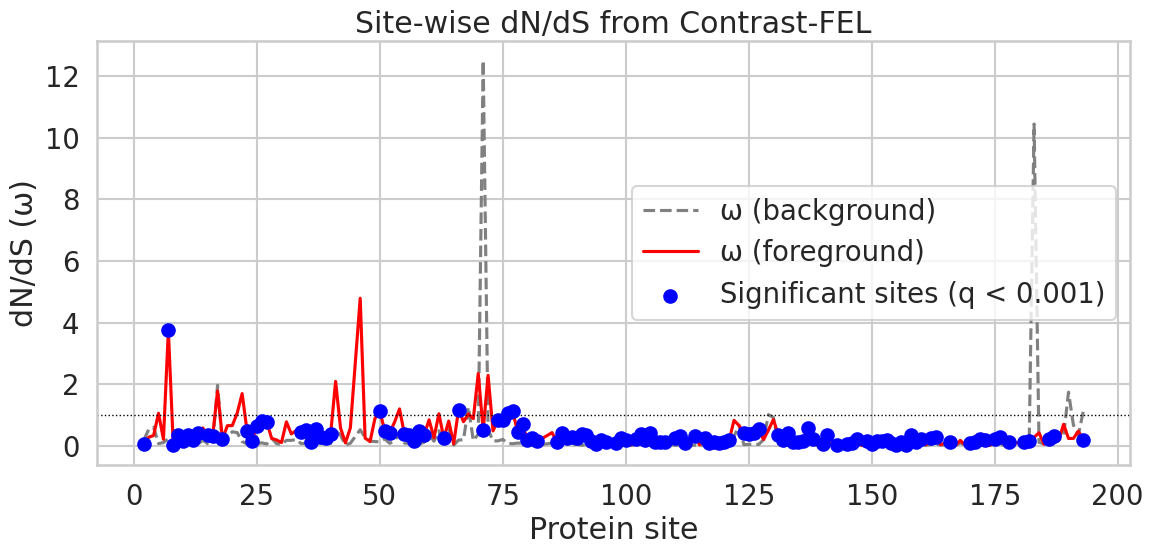

In [ ]:
# Sort by site number
df = df.sort_values("Site")

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df["Site"], df["omega_background"], label="ω (background)", color="gray", linestyle="--")
plt.plot(df["Site"], df["omega_foreground"], label="ω (foreground)", color="red")

# Highlight significant sites
sig = df[df["significant"]]
plt.scatter(sig["Site"], sig["omega_foreground"], color="blue", label="Significant sites (q < 0.001)", zorder=5)

plt.axhline(y=1.0, color="black", linestyle=":", linewidth=1)
plt.xlabel("Protein site")
plt.ylabel("dN/dS (ω)")
plt.title("Site-wise dN/dS from Contrast-FEL")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df

,Site,Partition,alpha,beta (background),beta (Foreground),subs (Foreground),P-value (overall),Q-value (overall),Permutation p-value,Total branch length,omega_background,omega_foreground,significant,sig_perm_and_omega_gt1
1,2,1,7.599,1.386,0.344,17.0,0.010,0.018,0.333,735.125,0.182392,0.045269,True,False
2,3,1,1.127,0.602,0.315,10.0,0.237,0.303,-1.000,179.093,0.534161,0.279503,False,False
3,4,1,1.392,0.841,0.469,13.0,0.316,0.398,-1.000,240.017,0.604167,0.336925,False,False
4,5,1,4.397,0.321,4.648,17.0,0.049,0.074,0.250,835.186,0.073004,1.057084,False,True
5,6,1,3.038,0.329,0.654,16.0,0.235,0.302,-1.000,323.347,0.108295,0.215273,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,189,1,0.429,0.138,0.300,20.0,0.562,0.642,-1.000,77.101,0.321678,0.699301,False,False
189,190,1,0.823,1.435,0.198,28.0,0.043,0.068,0.200,234.654,1.743621,0.240583,False,False
190,191,1,0.818,0.553,0.198,37.0,0.062,0.093,-1.000,139.287,0.676039,0.242054,False,False
191,192,1,0.691,0.241,0.330,47.0,0.600,0.677,-1.000,110.238,0.348770,0.477569,False,False


In [ ]:
df.sort_values("significant")

,Site,Partition,alpha,beta (background),beta (Foreground),subs (Foreground),P-value (overall),Q-value (overall),Permutation p-value,Total branch length,omega_background,omega_foreground,significant,sig_perm_and_omega_gt1
59,60,1,0.945,0.354,0.799,78.0,0.182,0.241,-1.0,189.421,0.374603,0.845503,False,False
163,164,1,0.966,0.024,0.036,39.0,0.354,0.433,-1.0,76.361,0.024845,0.037267,False,False
164,165,1,0.589,0.021,0.056,66.0,0.036,0.058,1.0,50.715,0.035654,0.095076,False,False
53,54,1,0.622,0.251,0.746,50.0,0.310,0.393,-1.0,149.482,0.403537,1.199357,False,True
52,53,1,0.821,0.137,0.636,72.0,0.096,0.138,-1.0,140.236,0.166870,0.774665,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,92,1,1.012,0.041,0.350,101.0,0.000,0.000,1.0,113.964,0.040514,0.345850,True,False
92,93,1,0.878,0.030,0.143,76.0,0.000,0.000,1.0,81.699,0.034169,0.162870,True,False
93,94,1,1.149,0.025,0.079,75.0,0.012,0.020,0.5,94.057,0.021758,0.068755,True,False
119,120,1,0.839,0.019,0.113,72.0,0.000,0.000,1.0,74.512,0.022646,0.134684,True,False


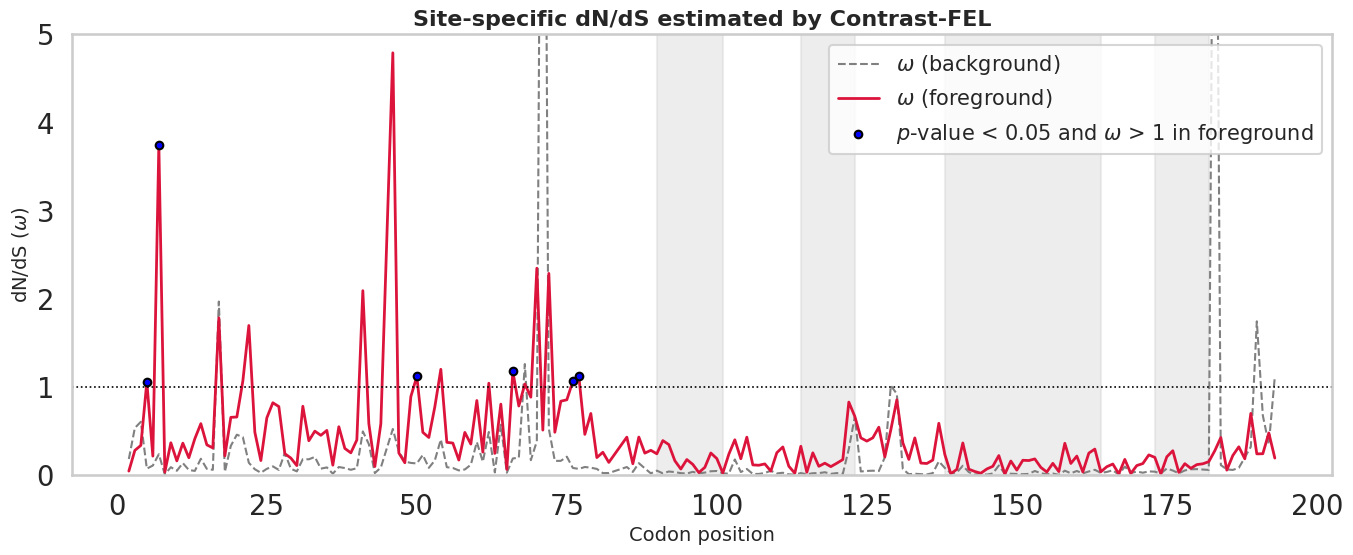

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Add a new column for sites with permuted p-value and omega > 1
#df["sig_perm_and_omega_gt1"] = (df["Permutation p-value"].notnull()) & (df["omega_foreground"] > 1)
df["sig_perm_and_omega_gt1"] = (df["P-value (overall)"] < 0.05) & (df["omega_foreground"] > 1)

# Set a more elegant style
sns.set(style="whitegrid", context="talk", font_scale=1.2)

# Sort by site number
df = df.sort_values("Site")

# Create the plot
plt.figure(figsize=(14, 6))

# Plot background and foreground omega values
plt.plot(df["Site"], df["omega_background"], label=r"$\omega$ (background)", color="gray", linestyle="--", linewidth=1.5)
plt.plot(df["Site"], df["omega_foreground"], label=r"$\omega$ (foreground)", color="crimson", linewidth=2)

# Highlight sites with permuted p-value present and omega_foreground > 1
highlight = df[df["sig_perm_and_omega_gt1"]]
plt.scatter(
    highlight["Site"],
    highlight["omega_foreground"],
    color="blue",
    s=30,
    edgecolor="black",
    label=r"$p$-value < 0.05 and $\omega$ > 1 in foreground",
    zorder=3
)
# Highlight helices
highlight_regions = {
    "aN": (90, 90 + 11),
    "a1": (114, 114 + 9),
    "a2": (138, 138 + 26),
    "a3": (173, 173 + 9),
}
for label, (start, end) in highlight_regions.items():
    plt.axvspan(start, end, color="lightgray", alpha=0.4, zorder=0)

# Reference line at omega = 1
plt.axhline(y=1.0, color="black", linestyle=":", linewidth=1.2)
plt.ylim(0, 5)
plt.grid(False)

# Axis labels and title
plt.xlabel("Codon position", fontsize=14)
plt.ylabel(r"dN/dS ($\omega$)", fontsize=14)
plt.title("Site-specific dN/dS estimated by Contrast-FEL", fontsize=16, weight='bold')

# Legend and layout
plt.legend(frameon=True, loc="upper right", fontsize=15)
plt.tight_layout()
plt.savefig("contrast_fel_plot_onlydNdS_greaterthan1.svg", format="svg")
plt.show()


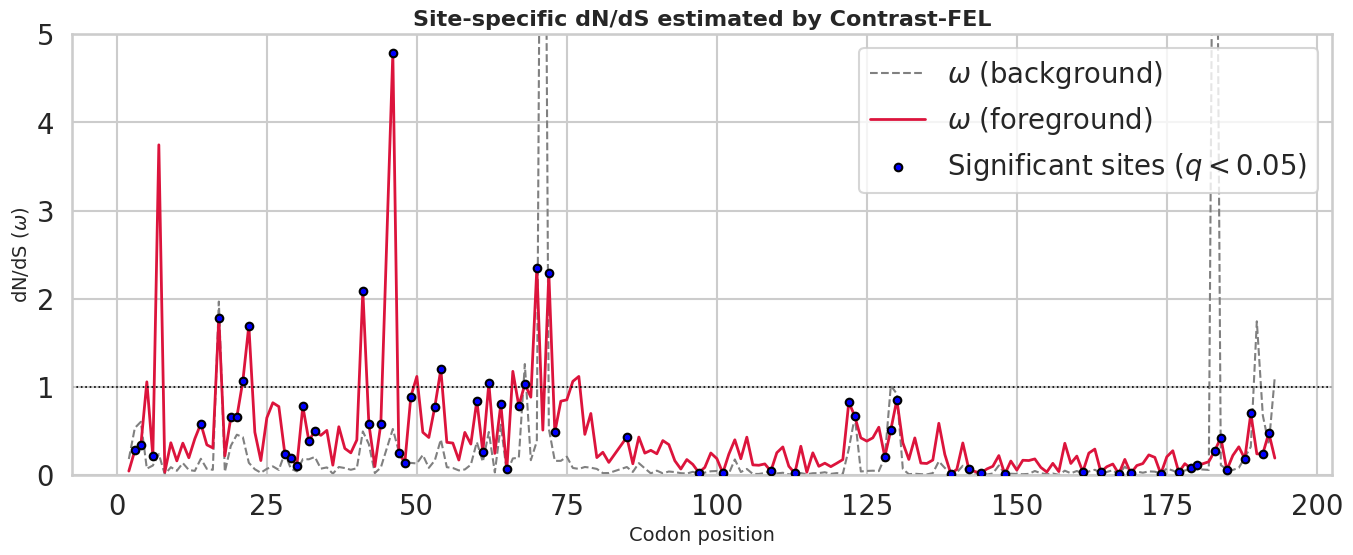

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a more elegant style
sns.set(style="whitegrid", context="talk", font_scale=1.2)

# Sort by site number
df = df.sort_values("Site")

# Create the plot
plt.figure(figsize=(14, 6))

# Plot background and foreground omega values
plt.plot(df["Site"], df["omega_background"], label=r"$\omega$ (background)", color="gray", linestyle="--", linewidth=1.5)
plt.plot(df["Site"], df["omega_foreground"], label=r"$\omega$ (foreground)", color="crimson", linewidth=2)

# Highlight significant sites
sig = df[df["significant"]]
plt.scatter(sig["Site"], sig["omega_foreground"], color="blue", s=30, edgecolor="black", label=r"Significant sites ($q < 0.05$)", zorder=3)

# Reference line at omega = 1
plt.axhline(y=1.0, color="black", linestyle=":", linewidth=1.2)
plt.ylim(0,5)

# Axis labels and title
plt.xlabel("Codon position", fontsize=14)
plt.ylabel(r"dN/dS ($\omega$)", fontsize=14)
plt.title("Site-specific dN/dS estimated by Contrast-FEL", fontsize=1, weight='bold')

# Legend and layout
plt.legend(frameon=True, loc="upper right")
plt.tight_layout()
plt.savefig("contrast_fel_plot.svg", format="svg")
plt.show()


In [ ]:
###Highlight Diagram

#aNhelix: 90, TO 90+11

#a1helix: 114, TO 114+9

#a2helix: 138, TO 138+26

#a3helix: 173, TO 173+9




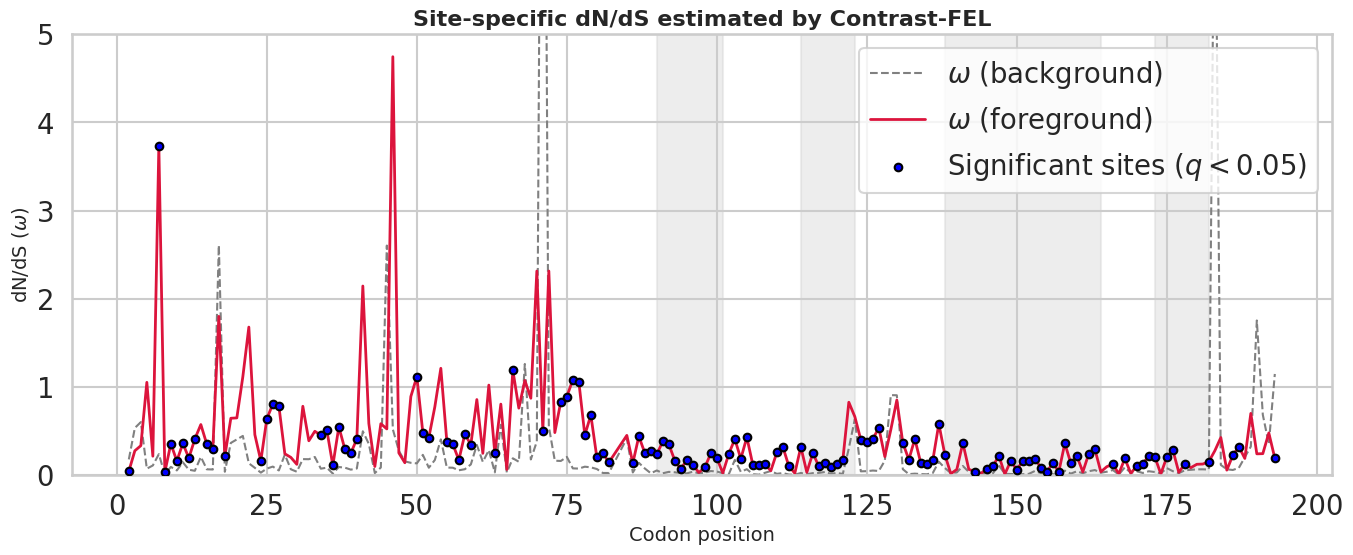

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a more elegant style
sns.set(style="whitegrid", context="talk", font_scale=1.2)

# Sort by site number
df = df.sort_values("Site")

# Create the plot
plt.figure(figsize=(14, 6))

# Plot background and foreground omega values
plt.plot(df["Site"], df["omega_background"], label=r"$\omega$ (background)", color="gray", linestyle="--", linewidth=1.5)
plt.plot(df["Site"], df["omega_foreground"], label=r"$\omega$ (foreground)", color="crimson", linewidth=2)

# Highlight significant sites
sig = df[df["significant"]]
plt.scatter(sig["Site"], sig["omega_foreground"], color="blue", s=30, edgecolor="black", label=r"Significant sites ($q < 0.05$)", zorder=3)

# Reference line at omega = 1
#plt.axhline(y=1.0, color="black", linestyle=":", linewidth=1.2)
plt.ylim(0, 5)

# Highlight helices
highlight_regions = {
    "aN": (90, 90 + 11),
    "a1": (114, 114 + 9),
    "a2": (138, 138 + 26),
    "a3": (173, 173 + 9),
}
for label, (start, end) in highlight_regions.items():
    plt.axvspan(start, end, color="lightgray", alpha=0.4, zorder=0)

# Axis labels and title
plt.xlabel("Codon position", fontsize=14)
plt.ylabel(r"dN/dS ($\omega$)", fontsize=14)
plt.title("Site-specific dN/dS estimated by Contrast-FEL", fontsize=16, weight='bold')

# Legend and layout
plt.legend(frameon=True, loc="upper right")
plt.tight_layout()
plt.savefig("contrast_fel_plot.svg", format="svg")
plt.show()


In [ ]:
# Look at the specific site (codon position 71)
site_71 = df[df["Site"] == 71]
print(site_71)


    Site  Partition  alpha  beta (background)  beta (Foreground)  \
70    71          1  1.244             15.349              0.625   

    subs (Foreground)  P-value (overall)  Q-value (overall)  \
70               35.0              0.018               0.03   

    Permutation p-value  Total branch length  omega_background  \
70                  1.0             1723.764         12.338424   

    omega_foreground  significant  
70          0.502412         True  


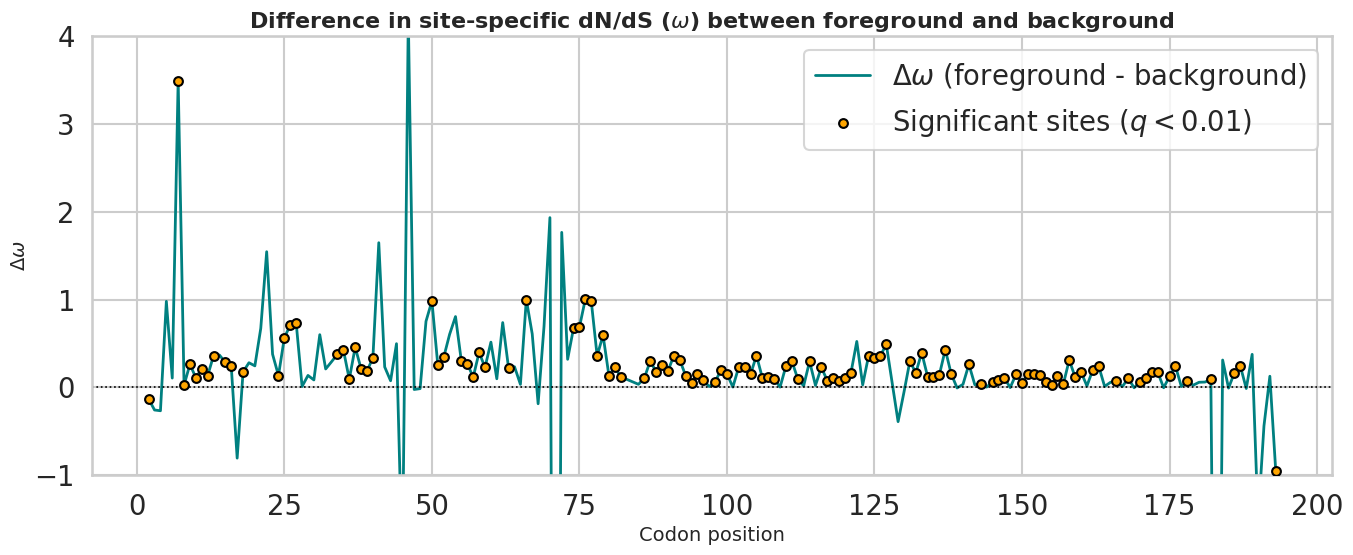

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid", context="talk", font_scale=1.2)

# Sort by site number
df = df.sort_values("Site")

# Calculate the difference
df["omega_diff"] = df["omega_foreground"] - df["omega_background"]

# Create the plot
plt.figure(figsize=(14, 6))

# Plot the difference in omega
plt.plot(df["Site"], df["omega_diff"], color="teal", linewidth=2, label=r"$\Delta\omega$ (foreground - background)")

# Highlight significant sites
sig = df[df["significant"]]
plt.scatter(sig["Site"], sig["omega_diff"], color="orange", s=40, edgecolor="black", label=r"Significant sites ($q < 0.01$)", zorder=3)

# Reference line at delta = 0
plt.axhline(y=0.0, color="black", linestyle=":", linewidth=1.2)
plt.ylim(-1,4)
# Labels and title
plt.xlabel("Codon position", fontsize=14)
plt.ylabel(r"$\Delta\omega$", fontsize=14)
plt.title(r"Difference in site-specific dN/dS ($\omega$) between foreground and background", fontsize=16, weight='bold')
# Legend and layout
plt.legend(frameon=True, loc="upper right")
plt.tight_layout()
plt.show()
